In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio,structural_similarity
from skimage.util import random_noise

In [2]:
imageWidth = 181
imageHeight = 217
slicesCount = 10
patchWindowRadius = 2
searchWindowRadius = 5

In [3]:
imageData = np.fromfile("imageInput5X5X5Slices10.bin",dtype = np.float32, sep = '')
imageData = imageData / np.max(imageData)
imageData = imageData.reshape(slicesCount, imageHeight, imageWidth).T

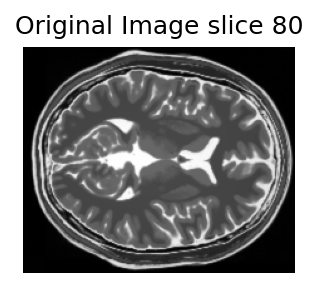

In [4]:
fig = plt.figure(figsize = (3, 2), dpi = 150)
plt.axis('off')
plt.title('Original Image slice 80')
plt.imshow(imageData[:, :, 0], cmap='gray')
plt.savefig('inputData.png')

In [5]:
inputDataWithNoise = np.fromfile("imageNoisyInputSlices10.bin",dtype = np.float32, sep = '')
minValue = np.min(inputDataWithNoise);
maxValue = np.max(inputDataWithNoise);
inputDataWithNoise = inputDataWithNoise.reshape(slicesCount, imageHeight, imageWidth).T
inputDataWithNoise = np.ascontiguousarray(inputDataWithNoise)
inputDataWithNoise /= maxValue

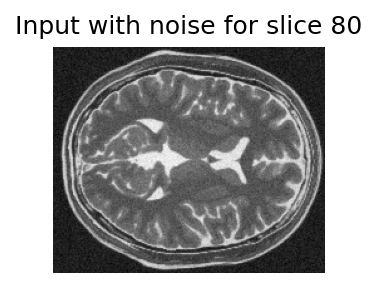

In [6]:
fig = plt.figure(figsize = (3, 2), dpi = 150)
plt.axis('off')
plt.title('Input with noise for slice 80')
plt.imshow(inputDataWithNoise[:, :, 0], cmap='gray')
plt.savefig('inputDataWithNoise.png')

In [7]:
sigma_est = np.mean(estimate_sigma(inputDataWithNoise, multichannel = False))
patch_kw = dict(patch_size = (2 * patchWindowRadius + 1), patch_distance = searchWindowRadius, channel_axis = -1)
denoisedData = denoise_nl_means(inputDataWithNoise, h = 1.15 * sigma_est, fast_mode = True, multichannel = False)

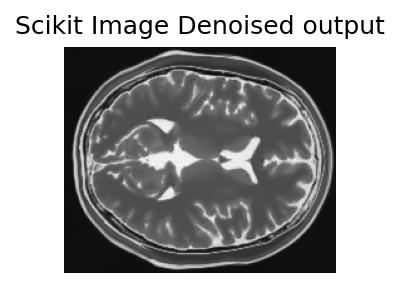

In [8]:
fig = plt.figure(figsize = (3, 2), dpi = 150)
plt.axis('off')
plt.title('Scikit Image Denoised output')
plt.imshow(denoisedData[:, :, 0], cmap='gray')
plt.savefig('scikitImageDenoised.png')

In [9]:
psnrValue = peak_signal_noise_ratio(imageData, denoisedData)
ssimValue = structural_similarity(imageData, denoisedData)
print("PSNR for scikit image denoising for patch radius = " + str(patchWindowRadius) + " and search window radius = " + str(searchWindowRadius) + " is " + str(psnrValue))
print("SSIM for scikit image denoising for patch radius = " + str(patchWindowRadius) + " and search window radius = " + str(searchWindowRadius) + " is " + str(ssimValue))

PSNR for scikit image denoising for patch radius = 2 and search window radius = 5 is 25.837890618958212
SSIM for scikit image denoising for patch radius = 2 and search window radius = 5 is 0.9548976565448941
